In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px


In [2]:
plt.rc('font', family='Malgun Gothic')

In [83]:
death = pd.read_excel("E:\\Eric_Github\\repo001\\Sample_Data\\death.xlsx", encoding="utf-8")

In [85]:
death.dtypes

#데이터 타입 확인 
#각 Feature 별로 데이터 타입을 확인해 보았다. 
#데이터의 내용에 따라 아래와 같이 분류해 보았다. 

발생일            int64
발생시간          object
주야            object
요일            object
발생지_시도        object
발생지_시군구       object
기상상태          object
노면상태_대분류      object
노면상태          object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
도로종류          object
도로형태_대분류      object
도로형태          object
교차로형태_대분류     object
교차로형태         object
도로선형_대분류      object
도로선형          object
경도           float64
위도           float64
dtype: object

In [86]:
# 1) Category Type, 
# 발생일, 발생시간, 주야, 요일 
# 발생지_시도, 발생지_시군구, 
# 기상상태, 노면상태_대분류, 노면상태
# 사고내용
# 도로종류, 도로형태_대분류, 도로형태
# 교차로형태_대분류, 교차로형태
# 도로선형_대분류 
# 도로선형

# 2)Numerical Type  
# 사망자수, 중상자수, 경상자수, 부상신고자수
# 경도, 위도 


In [6]:
## 요일(3) & 사망자수 

death1 = death.iloc[:,[3,10]]
death1 = pd.DataFrame(death1)
death1_grouped = death1["사망자수"].groupby(death1["요일"])
death_grouped_sum =death1_grouped.sum().sort_index(ascending=True)
b1 = pd.DataFrame(data=death_grouped_sum, columns=['사망자수'], index=['금','목','수','월','일','토','화'])
b2 = b1.loc[['월','화','수','목','금','토','일'],:]

## 주야(2) & 사망자수 

death9 = death.iloc[:,[2,10]]
death9 = pd.DataFrame(death9)
death9_grouped_sum = death9["사망자수"].groupby(death9["주야"]).sum()
de9 = pd.DataFrame(death9_grouped_sum).reset_index()
de9



## 발생일(0) & 사망자수 
death2 = death.iloc[:,[0,10]]
death2 = pd.DataFrame(death2)
death2_grouped = death2["사망자수"].groupby(death2["발생일"])
death2_grouped_sum =death2_grouped.sum()
de2 = pd.DataFrame(death2_grouped_sum)
de2 =de2.reset_index()

## 기상상태(6) & 사망자수 
death3 = death.iloc[:,[6,10]]
death3 = pd.DataFrame(death3)
death3_grouped = death3["사망자수"].groupby(death3["기상상태"])
death3_grouped_sum = death3_grouped.sum()
de3 = pd.DataFrame(death3_grouped_sum)
de3 =de3.reset_index()

## 노면상태(8) & 사망자수 
death4 = death.iloc[:,[8,10]]
death4 = pd.DataFrame(death4)
death4_grouped = death4["사망자수"].groupby(death4["노면상태"])
death4_grouped_sum = death4_grouped.sum()
de4 = pd.DataFrame(death4_grouped_sum)
de4 =de4.reset_index()

## 도로종류(14) & 사망자수

death5 = death.iloc[:,[14,10]]
death5 = pd.DataFrame(death5)
death5_grouped = death5["사망자수"].groupby(death5["도로종류"])
death5_grouped_sum = death5_grouped.sum()
de5 = pd.DataFrame(death5_grouped_sum)
de5 =de5.reset_index()

## 도로형태(16) & 사망자수

death6 = death.iloc[:,[16,10]]
death6 = pd.DataFrame(death6)
death6_grouped = death6["사망자수"].groupby(death6["도로형태"])
death6_grouped_sum = death6_grouped.sum()
de6 = pd.DataFrame(death6_grouped_sum)
de6 =de6.reset_index()

## 도로선형(20) & 사망자수

death7 = death.iloc[:,[20,10]]
death7 = pd.DataFrame(death7)
death7_grouped = death7["사망자수"].groupby(death7["도로선형"])
death7_grouped_sum = death7_grouped.sum()
de7 = pd.DataFrame(death7_grouped_sum)
de7 =de7.reset_index()

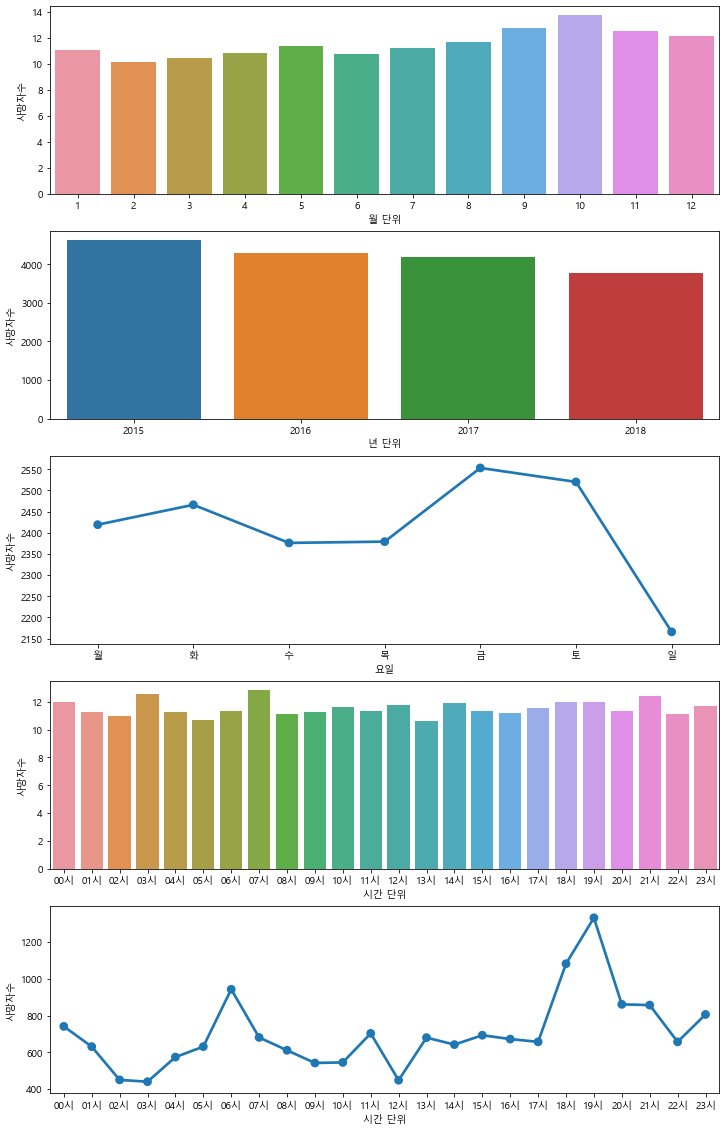

In [64]:
## EDA 과정.. 
##datetime -> year, month, day 로 쪼개보기 

de2['발생일']= pd.to_datetime(de2['발생일'], format = "%Y%m%d", errors='raise')
de2['년 단위'] = de2['발생일'].dt.year
de2['월 단위'] = de2['발생일'].dt.month
de2['시간 단위'] = death['발생시간']

fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(12,20)

monthgroup = pd.DataFrame(de2.groupby("월 단위")["사망자수"].mean()).reset_index()
sns.barplot(data=monthgroup,x="월 단위",y="사망자수", ax=ax1)

yeargroup = pd.DataFrame(de2.groupby("년 단위")["사망자수"].mean()).reset_index()
sns.barplot(data=yeargroup2,x="년 단위",y="사망자수", ax=ax2)

sns.pointplot(data=b3,x="요일",y="사망자수", ax=ax3)

timegroup = pd.DataFrame(de2.groupby("시간 단위")["사망자수"].mean()).reset_index()
sns.barplot(data=timegroup,x="시간 단위",y="사망자수", ax=ax4)


sns.pointplot(data=timegroup2,x="시간 단위",y="사망자수", ax=ax5)

In [77]:
yeargroup2 = pd.DataFrame(de2.groupby("년 단위")["사망자수"].sum()).reset_index()
yeargroup2

,년 단위,사망자수
0,2015,4621
1,2016,4292
2,2017,4185
3,2018,3781


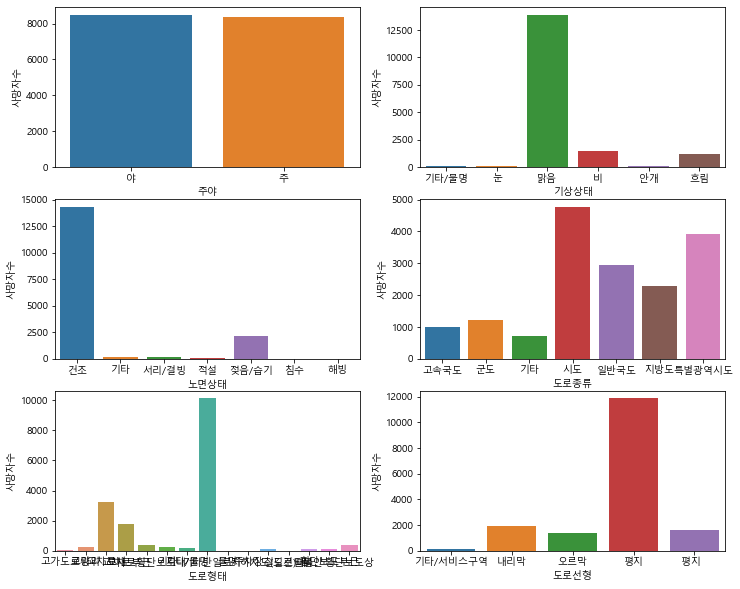

In [55]:
fig,axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 10)

sns.barplot(data=de9,y="사망자수",x="주야",ax=axes[0][0])
sns.barplot(data=de3,y="사망자수",x="기상상태",orient="v",ax=axes[0][1])
sns.barplot(data=de4,y="사망자수",x="노면상태",orient="v",ax=axes[1][0])
sns.barplot(data=de5,y="사망자수",x="도로종류",orient="v",ax=axes[1][1])
sns.barplot(data=de6,y="사망자수",x="도로형태",orient="v",ax=axes[2][0])
sns.barplot(data=de7,y="사망자수",x="도로선형",orient="v",ax=axes[2][1])

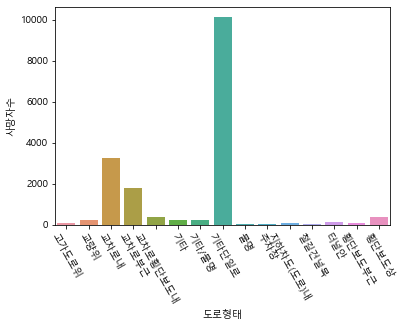

In [56]:
plt.xticks(rotation = - 60 )
sns.barplot(data=de6,y="사망자수",x="도로형태",orient="v")


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([1.09861229, 1.09861229, 1.09861229, ..., 3.25809654, 3.25809654,
         3.29583687])),
 (0.3264967358835883, 2.479328092778155, 0.9867901905885174))

C:\ProgramData\Anaconda3\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 8722 missing from current font.

C:\ProgramData\Anaconda3\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 8722 missing from current font.



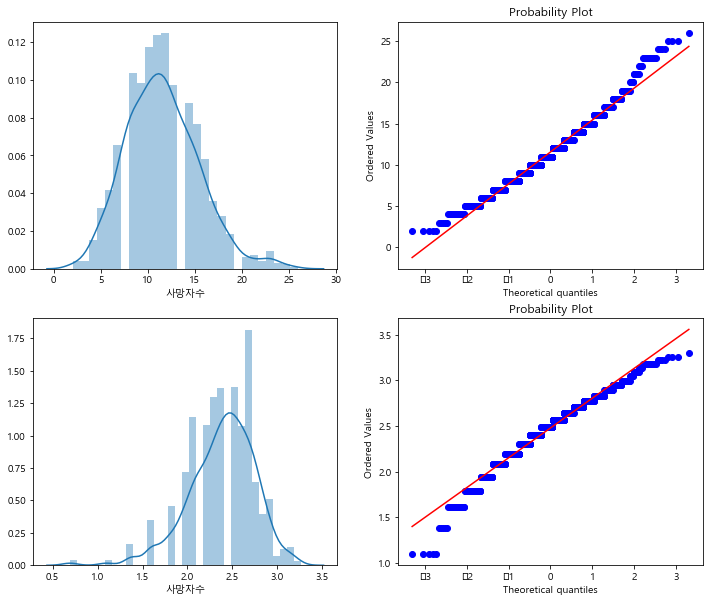

In [91]:
from scipy import stats
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(de2["사망자수"],ax=axes[0][0])
stats.probplot(de2["사망자수"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(de2["사망자수"]),ax=axes[1][0])
stats.probplot(np.log1p(de2["사망자수"]), dist='norm', fit=True, plot=axes[1][1])

## 

In [90]:
de2

,발생일,사망자수,년 단위,월 단위,시간 단위
0,2015-01-01,4,2015,1,05시
1,2015-01-02,8,2015,1,05시
2,2015-01-03,16,2015,1,14시
3,2015-01-04,17,2015,1,21시
4,2015-01-05,15,2015,1,06시
...,...,...,...,...,...
1455,2018-12-27,11,2018,12,13시
1456,2018-12-28,10,2018,12,21시
1457,2018-12-29,7,2018,12,23시
1458,2018-12-30,6,2018,12,23시
